In [2]:
# %matplotlib notebook
import glob
import matplotlib
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


params = {
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 15,  # Set the font size to 12 points
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
}
matplotlib.rcParams.update(params)

In [3]:
main_path = "/Users/starlabiitb/4U_1728-34/LAXPC/observations"
main_lcs = glob.glob(main_path + "/*/output/burst/0.1s*lc")
sub_lcs = glob.glob(main_path + "/*/output/burst/0.5s*lc")

main_lcs.sort()
sub_lcs.sort()

In [5]:
for i in main_lcs[0:5]:
    print(i)

/Users/starlabiitb/4U_1728-34/LAXPC/observations/20160805_G05_190T01_9000000578/output/burst/0.1s_15.0_21.0keV.lc
/Users/starlabiitb/4U_1728-34/LAXPC/observations/20160805_G05_190T01_9000000578/output/burst/0.1s_21.0_30.0keV.lc
/Users/starlabiitb/4U_1728-34/LAXPC/observations/20160805_G05_190T01_9000000578/output/burst/0.1s_3.0_9.0keV.lc
/Users/starlabiitb/4U_1728-34/LAXPC/observations/20160805_G05_190T01_9000000578/output/burst/0.1s_30.0_40.0keV.lc
/Users/starlabiitb/4U_1728-34/LAXPC/observations/20160805_G05_190T01_9000000578/output/burst/0.1s_9.0_15.0keV.lc


In [6]:
def get_lc_details(lightcurve_file):
    headers = fits.open(lightcurve_file)[0].header
    data = fits.open(lightcurve_file)[1].data
    obs_id = headers['OBS_ID']
    offset = headers['TSTARTI']
    time = np.array(data['TIME'])
    rate = np.array(data['RATE'])
    rate_err = np.array(data['ERROR'])
    return obs_id, time, rate, rate_err, offset

In [7]:
main_data_list = []
for i, lc in enumerate(main_lcs):
    obs_id, time, rate, rate_err, offset = get_lc_details(lc)
    main_data_list.append({
        'obs_id': obs_id,
        'time': time,
        'rate': rate,
        'rate_err': rate_err,
        'offset': offset
    })
main_data = pd.DataFrame(main_data_list)
print(len(main_data))

sub_data_list = []
for i, lc in enumerate(sub_lcs):
    obs_id, time, rate, rate_err, offset = get_lc_details(lc)
    sub_data_list.append({
        'obs_id': obs_id,
        'time': time,
        'rate': rate,
        'rate_err': rate_err,
        'offset': offset
    })
sub_data = pd.DataFrame(sub_data_list)
print(len(sub_data))

20
20


In [8]:
lightcurves = pd.DataFrame({
        'o1s_time': main_data['time'],
        'o1s_rate': main_data['rate'],
        'o1s_rate_err': main_data['rate_err'],
        'o1s_offset': main_data['offset'],
        'o5s_time': sub_data['time'],
        'o5s_rate': sub_data['rate'],
        'o5s_rate_err': sub_data['rate_err'],
        'o5s_offset': sub_data['offset']
    })

In [24]:
obs_id_1 = {
    'o1s_time': lightcurves['o1s_time'][0:5] - lightcurves['o1s_offset'][0],
    'o1s_rate': lightcurves['o1s_rate'][0:5],
    'o1s_rate_err': lightcurves['o1s_rate_err'][0:5],
    'o1s_offset': lightcurves['o1s_offset'][0:5]
}

obs_id_2 = {
    'o1s_time': lightcurves['o1s_time'][5:10],
    'o1s_rate': lightcurves['o1s_rate'][5:10],
    'o1s_rate_err': lightcurves['o1s_rate_err'][5:10],
    'o1s_offset': lightcurves['o1s_offset'][5:10]
}

obs_id_3 = {
    'o1s_time': lightcurves['o1s_time'][10:15],
    'o1s_rate': lightcurves['o1s_rate'][10:15],
    'o1s_rate_err': lightcurves['o1s_rate_err'][10:15],
    'o1s_offset': lightcurves['o1s_offset'][10:15]
}

obs_id_4 = {
    'o1s_time': lightcurves['o1s_time'][15:20],
    'o1s_rate': lightcurves['o1s_rate'][15:20],
    'o1s_rate_err': lightcurves['o1s_rate_err'][15:20],
    'o1s_offset': lightcurves['o1s_offset'][15:20]
}

In [37]:
peaks, _ = find_peaks(obs_id_1['o1s_rate'][0], height=200, width=10)
peaks

tmin = obs_id_1['o1s_time'][0][peaks]-10
tmax = tmin+100
# mask = (obs_id_1['o1s_time'][0] > tmin) & (obs_id_1['o1s_time'][0] < tmax)
tmin

array([41225.8678633])

(-10.0, 40.0)

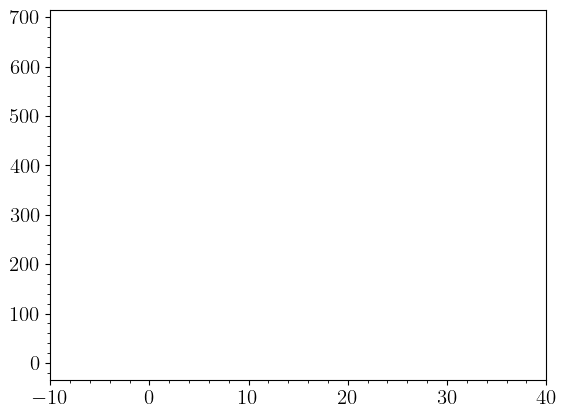

In [36]:
plt.plot(obs_id_1['o1s_time'][0][mask] + 1.5, obs_id_1['o1s_rate'][0][mask], lw =1, c = "C2")
plt.xlim(-10, 40)

(-5.0, 30.0)

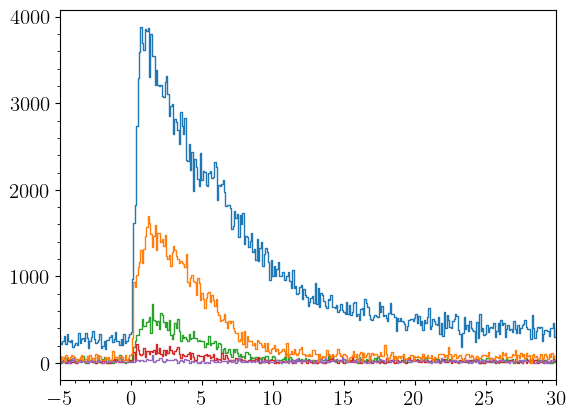

In [31]:
plt.step(obs_id_1['o1s_time'][0] - t_burst + 1.5, obs_id_1['o1s_rate'][0], where='mid', lw =1, c = "C2")
plt.step(obs_id_1['o1s_time'][1] - t_burst + 1.5, obs_id_1['o1s_rate'][1], where='mid', lw =1, c = "C3")
plt.step(obs_id_1['o1s_time'][2] - t_burst + 1.5, obs_id_1['o1s_rate'][2], where='mid', lw =1, c = "C0")
plt.step(obs_id_1['o1s_time'][3] - t_burst + 1.5, obs_id_1['o1s_rate'][3], where='mid', lw =1, c = "C4")
plt.step(obs_id_1['o1s_time'][4] - t_burst + 1.5, obs_id_1['o1s_rate'][4], where='mid', lw =1, c = "C1")
plt.xlim(-5,30)
# plt.xlim(obs_id_1['o1s_time'][0][peaks] - obs_id_1["o1s_offset"][0] - 10, obs_id_1['o1s_time'][0][peaks] - obs_id_1["o1s_offset"][0] + 30)

In [50]:
obs_id_1 = {
    "obs_id": data["obs_id"][0:5],
    "time": data["time"][0:5],
    "rate": data["rate"][0:5],
    "rate_err": data["rate_err"][0:5]
    }
obs_id_1 = pd.DataFrame(obs_id_1)

obs_id_2 = {
    "obs_id": data["obs_id"][5:10],
    "time": data["time"][5:10],
    "rate": data["rate"][5:10],
    "rate_err": data["rate_err"][5:10]
    }
obs_id_2 = pd.DataFrame(obs_id_2)

obs_id_3 = {
    "obs_id": data["obs_id"][10:15],
    "time": data["time"][10:15],
    "rate": data["rate"][10:15],
    "rate_err": data["rate_err"][10:15]
    }
obs_id_3 = pd.DataFrame(obs_id_3)

obs_id_4 = {
    "obs_id": data["obs_id"][15:20],
    "time": data["time"][15:20],
    "rate": data["rate"][15:20],
    "rate_err": data["rate_err"][15:20]
    }
obs_id_4 = pd.DataFrame(obs_id_4)


15    [30.0, 0.0, 30.0, 50.0, 70.0, 20.0, 0.0, 0.0, ...
16    [10.0, 0.0, 30.0, 0.0, 20.0, 30.0, 10.0, 0.0, ...
17    [160.0, 270.0, 250.0, 220.0, 370.0, 180.0, 230...
18    [30.0, 20.0, 20.0, 0.0, 10.0, 20.0, 40.0, 30.0...
19    [90.0, 60.0, 110.0, 80.0, 50.0, 70.0, 110.0, 5...
Name: rate, dtype: object

20
20
Burst Start Times (in seconds): [41234.36786329746, 41234.36786329746, 41234.36786329746, 41234.36786329746, 41234.36786329746, 41234.36786329746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708204746, 64653.56708

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


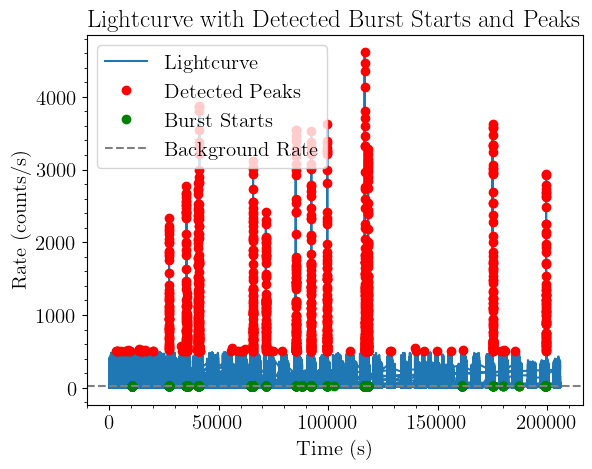

In [40]:
# %matplotlib notebook
import glob
import matplotlib
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

params = {
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 15,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
}
matplotlib.rcParams.update(params)

main_path = "/Users/starlabiitb/4U_1728-34/LAXPC/observations"
main_lcs = glob.glob(main_path + "/*/output/burst/0.1s*lc")
sub_lcs = glob.glob(main_path + "/*/output/burst/0.5s*lc")

main_lcs.sort()
sub_lcs.sort()

def get_lc_details(lightcurve_file):
    headers = fits.open(lightcurve_file)[0].header
    data = fits.open(lightcurve_file)[1].data
    obs_id = headers['OBS_ID']
    offset = headers['TSTARTI']
    time = np.array(data['TIME'])
    rate = np.array(data['RATE'])
    rate_err = np.array(data['ERROR'])
    return obs_id, time, rate, rate_err, offset

main_data_list = []
for i, lc in enumerate(main_lcs):
    obs_id, time, rate, rate_err, offset = get_lc_details(lc)
    main_data_list.append({
        'obs_id': obs_id,
        'time': time,
        'rate': rate,
        'rate_err': rate_err,
        'offset': offset
    })
main_data = pd.DataFrame(main_data_list)
print(len(main_data))

sub_data_list = []
for i, lc in enumerate(sub_lcs):
    obs_id, time, rate, rate_err, offset = get_lc_details(lc)
    sub_data_list.append({
        'obs_id': obs_id,
        'time': time,
        'rate': rate,
        'rate_err': rate_err,
        'offset': offset
    })
sub_data = pd.DataFrame(sub_data_list)
print(len(sub_data))

# Combine data (corrected, no concatenation for 'offset')
lightcurves = pd.DataFrame({
        'o1s_time': np.concatenate(main_data['time'].to_numpy()),    # Concatenate time arrays
        'o1s_rate': np.concatenate(main_data['rate'].to_numpy()),    # Concatenate rate arrays
        'o1s_rate_err': np.concatenate(main_data['rate_err'].to_numpy()),  # Concatenate rate_err arrays
        'o1s_offset': np.repeat(main_data['offset'].to_numpy(), [len(t) for t in main_data['time']])  # Repeat offset
    })

# Subtract the offset from the time to get absolute time
lightcurves['o1s_time_adjusted'] = lightcurves['o1s_time'] - lightcurves['o1s_offset']

# Estimate background as median rate
background_rate = np.median(lightcurves['o1s_rate'])

# Find the peaks in the rate data (potential bursts)
peaks, _ = find_peaks(lightcurves['o1s_rate'], height=500)  # Adjust height threshold as necessary

# Function to find burst start (where rate begins to rise significantly above background)
def find_burst_start(time, rate, peak_idx, background, threshold=2):
    """
    Find the time where the burst starts by moving backwards from the peak.
    The start is defined as the point where the rate rises significantly above the background.
    
    Parameters:
    - time: array of time values
    - rate: array of rate values
    - peak_idx: index of the peak
    - background: background rate value
    - threshold: multiplier for the background to define burst start
    
    Returns:
    - burst_start_time: estimated burst start time
    """
    for i in range(peak_idx, 0, -1):
        if rate[i] <= background * threshold:
            return time[i]
    return time[0]  # If no clear start found, return the first time point

# Get the times of the peaks
burst_times = lightcurves['o1s_time_adjusted'][peaks]
burst_rates = lightcurves['o1s_rate'][peaks]

# Find the start of each burst
burst_starts = [find_burst_start(lightcurves['o1s_time_adjusted'], lightcurves['o1s_rate'], peak, background_rate) for peak in peaks]

# Print burst start times and peak times
print("Burst Start Times (in seconds):", burst_starts)
print("Burst Peak Times (in seconds):", burst_times)
print("Corresponding Burst Rates:", burst_rates)

# Plotting the lightcurve with identified bursts and start points
plt.figure()
plt.plot(lightcurves['o1s_time_adjusted'], lightcurves['o1s_rate'], label='Lightcurve')
plt.plot(burst_times, burst_rates, 'ro', label='Detected Peaks')
plt.plot(burst_starts, [background_rate] * len(burst_starts), 'go', label='Burst Starts')
plt.axhline(y=background_rate, color='gray', linestyle='--', label='Background Rate')
plt.xlabel('Time (s)')
plt.ylabel('Rate (counts/s)')
plt.title('Lightcurve with Detected Burst Starts and Peaks')
plt.legend()
plt.show()


20
20


ValueError: zero-dimensional arrays cannot be concatenated